# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Charles\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


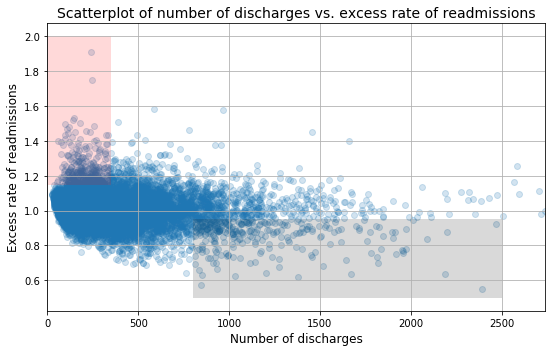

In [35]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='black', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

The preliminary report is correct in pointing out that there seem to be correlation between increasing discharge number and the excess readmission rate.

The correlation needs to be tested to see how strong it is. 

In addition, the regulatory suggestion isn't accounting for the fact that different hospitals treat more or less of certain types of illness, and the excess rate of readmission might be different between each type of illness. 

The ability to "predict" 30-day readmissions for each type of illness might vary and as such the excess rate calculation can potentially be unequal for different types of illness. 

There needs to a test to determine if there is statistical significance between excess readmission rate for hospitals with high and low discharge rate.

# ANOVA Test to determine if there is statistical difference between the mean of each illness' excess rate of readmission.

Ho: Mean(AMI)=Mean(COPD)=Mean(HF)=Mean(KNEE)=Mean(PN)

Ha: Two or more means are different from the others

In [6]:
AMI = hospital_read_df[hospital_read_df['Measure Name']=='READM-30-AMI-HRRP'][['Excess Readmission Ratio']]
COPD = hospital_read_df[hospital_read_df['Measure Name']=='READM-30-COPD-HRRP'][['Excess Readmission Ratio']]
HF = hospital_read_df[hospital_read_df['Measure Name']=='READM-30-HF-HRRP'][['Excess Readmission Ratio']]
KNEE = hospital_read_df[hospital_read_df['Measure Name']=='READM-30-HIP-KNEE-HRRP'][['Excess Readmission Ratio']]
PN = hospital_read_df[hospital_read_df['Measure Name']=='READM-30-PN-HRRP'][['Excess Readmission Ratio']]

AMI = AMI.dropna()
COPD = COPD.dropna()
HF = HF.dropna()
KNEE = KNEE.dropna()
PN = PN.dropna()

In [7]:
import scipy.stats as stats
stats.f_oneway(AMI, COPD, HF, KNEE, PN)

F_onewayResult(statistic=array([2.20122406]), pvalue=array([0.06622435]))

The p-value is significantly higher than alpha 0.01, and as such we do not reject null hypothesis and conclude that there is no statistical significant difference between each illness' excess rate of readmission. 

# Plot linear regression line

slope = -2.856505294381995e-05
intercept = 1.01794755795442


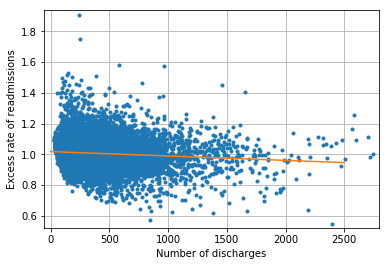

In [8]:

_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Number of discharges')
_ = plt.ylabel('Excess rate of readmissions')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(x, y,1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)

# Make theoretical line to plot
xa = np.array([0,2500])
ya = a * xa + b

# Add regression line to your plot
_ = plt.plot(xa, ya)
plt.grid(True)
# Draw the plot
plt.show()


# Calculate correlation and pvalue of non-correlation test

Ho: Number of discharges and Excesss rate of readmissions are uncorrelated

Ha: They are correlated

In [9]:
correlation, p_value = stats.pearsonr(x, y)
print('Correlation ', correlation)
print('P Value ', p_value)

Correlation  -0.09309554287590441
P Value  1.5022756426464526e-23


P-Value is small and < alpha of 0.01. We reject null hypothesis and conclude the data are correlated. 

# Test large discharge vs lower discharge

H0: Hospitals with a larger number of discharges have identical excess readmission ratio as hospitals with a smaller amount of discharges 

H1: The rate of excess readmissions ratio is not the same

In [47]:
ex_read_100 = clean_hospital_read_df[pd.to_numeric(clean_hospital_read_df['Number of Discharges']) < 100][['Excess Readmission Ratio']]
ex_read_1000 = clean_hospital_read_df[pd.to_numeric(clean_hospital_read_df['Number of Discharges']) > 1000][['Excess Readmission Ratio']]
data_mean_diff = np.mean(ex_read_100)-np.mean(ex_read_1000)
z_score = data_mean_diff/np.sqrt(np.var(ex_read_100)/len(ex_read_100)+np.var(ex_read_1000)/len(ex_read_1000))

p = 2*(1-stats.norm.cdf(z_score))

print(p)

#since p value is less than 0.01 it rejects Null hypothesis and we can conclude that there is statistical signifcance in excess
#readmission between hospitals with large number of discharges and low number of discharges


[2.35367281e-14]


Statistical significance is based on hypothesis testing to determine p-value which are then matched to choosen alpha. Statistical significance doesn't mean it has to be practical significance. Practical significance is determined by the actual situation as sometimes statistical significances might have actual small effect and are not practical to pursue any material changes. 

In this situation, they do potentially differ due to the practicallity of consolidating & expanding hospitals and the geography that they serve. As an example consolidating smaller hospitals in a major city might be feasible but doing so in a rural area where the population is spread over a large area might not be possible without reducing service quality and response time. 

Change I would make to the recommendation is rather than require small hospitals  to demonstrate upgraded resource allocation, it should help to provide incentives to encourage the small hospitals to upgrade. These incentives might then vary depending on the location of each of the hospitals. 

The scatter plot visually show a trend in readdmision and hospital size. It is simple to interpret as the reader can quickly understand where the analyst is coming from. 

A weakness is that it isn't very clear just how steep the correlation is. As such, I have graphed in a linear regression line to highlight to negative correlation between the two data sets. 

# Misc. Data Exploration

In [10]:
list(hospital_read_df.columns.values)

['Hospital Name',
 'Provider Number',
 'State',
 'Measure Name',
 'Number of Discharges',
 'Footnote',
 'Excess Readmission Ratio',
 'Predicted Readmission Rate',
 'Expected Readmission Rate',
 'Number of Readmissions',
 'Start Date',
 'End Date']

In [39]:
#x=hospital_read_df['Measure Name']

#x=hospital_read_df.sort_values("Measure Name") 
#x=x.drop_duplicates(subset ="Measure Name") 
#y=hospital_read_df.sort_values("State") 
#y=y.drop_duplicates(subset ="State") 

In [12]:
#print(x['Measure Name'])
#y['State']

In [13]:
print(hospital_read_df[hospital_read_df['Hospital Name']=='NORTHWESTERN MEMORIAL HOSPITAL'][['Measure Name','Excess Readmission Ratio','Number of Discharges']])

                Measure Name  Excess Readmission Ratio Number of Discharges
27    READM-30-HIP-KNEE-HRRP                    1.4026                 1658
1577        READM-30-PN-HRRP                    1.1006                  732
2013      READM-30-COPD-HRRP                    1.0855                  420
2493       READM-30-AMI-HRRP                    1.0724                  265
5232        READM-30-HF-HRRP                    1.0214                 1158


In [14]:
print(hospital_read_df[hospital_read_df['Hospital Name']=='WILSON MEMORIAL HOSPITAL'][['Measure Name','Excess Readmission Ratio','Number of Discharges']])

                 Measure Name  Excess Readmission Ratio Number of Discharges
8034       READM-30-COPD-HRRP                    0.9816                  130
11531        READM-30-HF-HRRP                    0.9251                  117
12256        READM-30-PN-HRRP                    0.9049                  182
12477  READM-30-HIP-KNEE-HRRP                    0.8967        Not Available
15469       READM-30-AMI-HRRP                       NaN        Not Available


In [91]:
#hospital_read_df['Number of Discharges']

In [15]:
print(len(x))

11494


In [32]:
count = 0
for i in x : 
    if i < 100 : 
        count = count + 1
        
print (count)

1188


In [33]:
count = 0
for i in x : 
    if i > 1000 : 
        count = count + 1
        
print (count)

460
